# Transformada de Fourier

1. Definição da Transformada de Fourier
2. Transformada de Fourier Bidimensional
    2.1 Transformação rápida de Fourier usando Python
3. Convolução
    3.1 Convolução no Espaço de Fourier
4. Filtragem no domínio da frequência
    4.1 Filtro passa-baixo ideal
    4.2 Filtro Butterworth Lowpass
    4.3 Filtro Gaussiano Lowpass
    4.4 Filtro passa-alto ideal
    4.5 Filtro Butterworth Highpass
    4.6 Filtro Gaussiano Highpass
    4.7 Filtro passa-banda

In [1]:
import cv2 as cv
print("OpenCV: ", cv.__version__)
import numpy as np
print("numpy: ", np.__version__)
import matplotlib.pyplot as plt
plt.style.use('classic')
#%matplotlib
#%matplotlib notebook
#%matplotlib inline
%matplotlib widget
import scipy.fftpack as fftim

OpenCV:  4.7.0
numpy:  1.24.2


(1086, 663, 3)


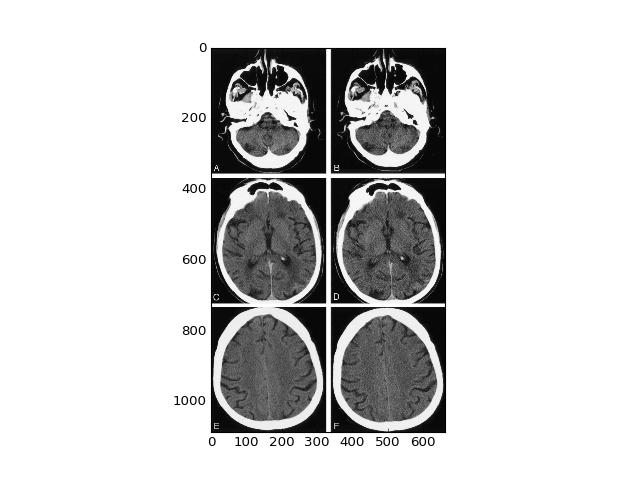

In [2]:
img = cv.imread('Imagens/image1.png')
print(img.shape)
fig = plt.figure()
ax = plt.axes()
ax.imshow(img, 'gray')

In [3]:
# Converting the image to grayscale.
imgG = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

## Definição da Transformada de Fourier

Inicialmente focamos nas imagens no domínio espacial, ou seja, no mundo físico. trabalharemos agora com uma abordagem no domínio da frequência. O processo de conversão de uma imagem do domínio espacial para o domínio da frequência fornece informações valiosas sobre a natureza da imagem. Em alguns casos, uma operação pode ser realizada de forma mais eficiente no domínio da frequência do que no domínio espacial.

O matemático francês Jean Joseph Fourier desenvolveu transformadas de Fourier na tentativa de resolver a equação do calor. Durante o processo, ele reconheceu que uma função pode ser expressa como somas infinitas de senos e cossenos de diferentes frequências, agora conhecidas como séries de Fourier. A transformada de Fourier é uma representação na qual qualquer função pode ser expressa como a integral de senos e cossenos multiplicada pela função ponderada. Além disso, qualquer função representada em série de Fourier pode ser reconstruída completamente por um processo inverso. Este processo é conhecido como transformada inversa de Fourier.

No processamento de imagens, as transformadas de Fourier são usadas para:

* Filtragem de imagem

* Compressão de imagem

* Aprimoramento de imagem

* Restauração de imagem

* Análise de imagem

* Reconstrução de imagem

A transformada de Fourier de uma função contínua $f(x)$ se define como:

$$ F(u) = \int_{-\inf}^{\inf} f(x)e^{-i2\pi ux}dx$$



In [4]:
#Transformada de Fourier Bidimensional
    

In [5]:
#Transformação rápida de Fourier usando Python
help(np.fft.fft2)

Help on function fft2 in module numpy.fft:

fft2(a, s=None, axes=(-2, -1), norm=None)
    Compute the 2-dimensional discrete Fourier Transform.
    
    This function computes the *n*-dimensional discrete Fourier Transform
    over any axes in an *M*-dimensional array by means of the
    Fast Fourier Transform (FFT).  By default, the transform is computed over
    the last two axes of the input array, i.e., a 2-dimensional FFT.
    
    Parameters
    ----------
    a : array_like
        Input array, can be complex
    s : sequence of ints, optional
        Shape (length of each transformed axis) of the output
        (``s[0]`` refers to axis 0, ``s[1]`` to axis 1, etc.).
        This corresponds to ``n`` for ``fft(x, n)``.
        Along each axis, if the given shape is smaller than that of the input,
        the input is cropped.  If it is larger, the input is padded with zeros.
        if `s` is not given, the shape of the input along the axes specified
        by `axes` is used.
  

In [6]:
help(fftim.fft2)

Help on function fft2 in module scipy.fftpack._basic:

fft2(x, shape=None, axes=(-2, -1), overwrite_x=False)
    2-D discrete Fourier transform.
    
    Return the 2-D discrete Fourier transform of the 2-D argument
    `x`.
    
    See Also
    --------
    fftn : for detailed information.
    
    Examples
    --------
    >>> from scipy.fftpack import fft2, ifft2
    >>> y = np.mgrid[:5, :5][0]
    >>> y
    array([[0, 0, 0, 0, 0],
           [1, 1, 1, 1, 1],
           [2, 2, 2, 2, 2],
           [3, 3, 3, 3, 3],
           [4, 4, 4, 4, 4]])
    >>> np.allclose(y, ifft2(fft2(y)))
    True



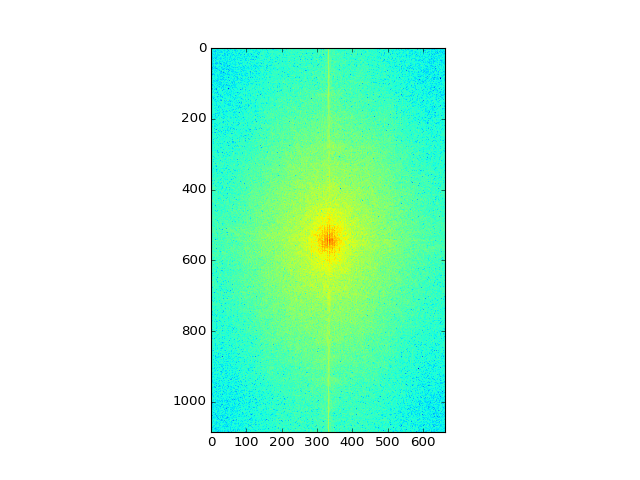

In [7]:
# Performing FFT.
imgFFtsci = abs(fftim.fft2(imgG))
# Shifting the Fourier frequency image.
imgFFtsci = fftim.ifftshift(imgFFtsci)
imgFFtSpec1 = 20*np.log(np.abs(imgFFtsci))

fig = plt.figure()
ax = plt.axes()
ax.imshow(imgFFtSpec1)

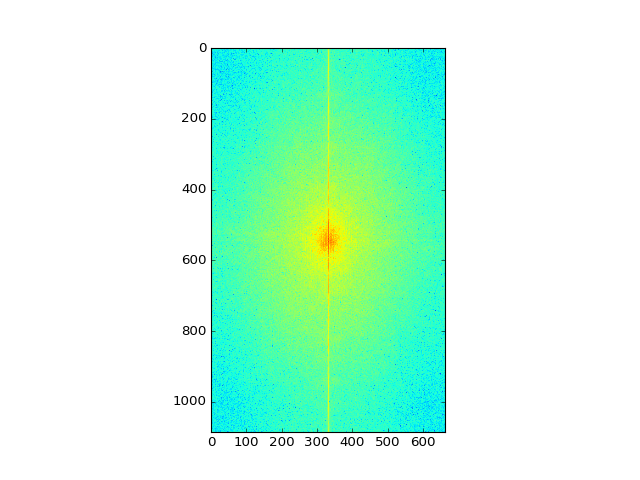

In [8]:
# Performing FFT.

imgFFtnp = np.fft.fft2(imgG)
imgFFtnp = np.fft.fftshift(imgFFtnp)
imgFFtSpec2 = 20*np.log(np.abs(imgFFtnp))

fig = plt.figure()
ax = plt.axes()
ax.imshow(imgFFtSpec2)

In [9]:
help(np.fft.ifft2)

Help on function ifft2 in module numpy.fft:

ifft2(a, s=None, axes=(-2, -1), norm=None)
    Compute the 2-dimensional inverse discrete Fourier Transform.
    
    This function computes the inverse of the 2-dimensional discrete Fourier
    Transform over any number of axes in an M-dimensional array by means of
    the Fast Fourier Transform (FFT).  In other words, ``ifft2(fft2(a)) == a``
    to within numerical accuracy.  By default, the inverse transform is
    computed over the last two axes of the input array.
    
    The input, analogously to `ifft`, should be ordered in the same way as is
    returned by `fft2`, i.e. it should have the term for zero frequency
    in the low-order corner of the two axes, the positive frequency terms in
    the first half of these axes, the term for the Nyquist frequency in the
    middle of the axes and the negative frequency terms in the second half of
    both axes, in order of decreasingly negative frequency.
    
    Parameters
    ----------


In [10]:
help(fftim.ifft2)

Help on function ifft2 in module scipy.fftpack._basic:

ifft2(x, shape=None, axes=(-2, -1), overwrite_x=False)
    2-D discrete inverse Fourier transform of real or complex sequence.
    
    Return inverse 2-D discrete Fourier transform of
    arbitrary type sequence x.
    
    See `ifft` for more information.
    
    See Also
    --------
    fft2, ifft
    
    Examples
    --------
    >>> from scipy.fftpack import fft2, ifft2
    >>> y = np.mgrid[:5, :5][0]
    >>> y
    array([[0, 0, 0, 0, 0],
           [1, 1, 1, 1, 1],
           [2, 2, 2, 2, 2],
           [3, 3, 3, 3, 3],
           [4, 4, 4, 4, 4]])
    >>> np.allclose(y, fft2(ifft2(y)))
    True



(-0.5, 662.5, 1085.5, -0.5)

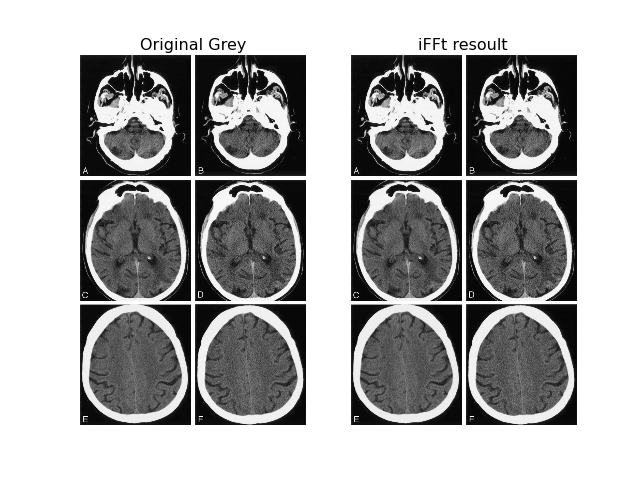

In [11]:
imgFFtnp = np.fft.ifftshift(imgFFtnp)
imgBack = np.fft.ifft2(imgFFtnp)
imgBack = np.real(imgBack).astype(np.uint8)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgBack, cmap='gray')
ax[1].set_title('iFFt resoult')
ax[1].axis('off')

### Convolução

A convolução foi brevemente discutida anteriormenmte quando tratamos de filtros espaciais. Aqui  discutiremos alguns aspectos matemáticos da convolução.

A convolução é uma operação matemática que expressa a integral da sobreposição entre duas funções. Um exemplo simples é uma imagem desfocada, obtida pela convolução de uma imagem não desfocada com uma função de desfoque.

Existem muitos casos de imagens borradas que vemos na vida real. Uma fotografia de um carro em alta velocidade está borrada devido ao movimento. Uma fotografia de uma estrela obtida de um telescópio é borrada pelas partículas na atmosfera. Uma imagem de microscópio de campo amplo de um objeto é desfocada por um sinal fora do plano. Essa indefinição pode ser modelada como uma operação de convolução e eliminada pelo processo inverso chamado deconvolução.

Começamos a discussão com a convolução no espaço de Fourier. A operação de convolução é expressa matematicamente como:

$$ [f * g](t) = \int_0^t f(\tau)g(t - \tau)d\tau $$

onde $f$ e $g$ são duas funções e $*$ representa aconvolução. A convolução satisfaz as seguintes propriedades:

1. $f * g = g * f$ 

2. $f * (g * h) = (f * g) * h$

3. $f * (g + h) = (f * g) + (f * h)$


### Convolução no Espaço de Fourier

Vamos assumir que a convolução de $f$ e $g$ é a função $h$. 

$$ h(t) = [f ∗ g](t)$$

Se a transformada de Fourier desta função for $H$, então $H$ é definido como 

$$ H = F.G $$

onde $F$ e $G$ são as transformadas de Fourier das funções $f$ e $g$ respectivamente e o $.$ (ponto) representa a multiplicação. Assim, no espaço de Fourier, a complexa operação de convolução é substituída por uma multiplicação mais simples. 

### Filtragem no domínio da frequência

O princípio de convolução pode ser usado para filtragem. Nos filtros passa-baixa, apenas as baixas frequências da transformada de Fourier são usadas enquanto as altas frequências são bloqueadas. Da mesma forma, em filtros passa-alto, apenas as altas frequências da transformada de Fourier são usadas enquanto as baixas frequências são bloqueadas. Os filtros passa-baixa são usados para suavizar a imagem ou reduzir o ruído, enquanto os filtros passa-alta são usados para aguçar as bordas. Em cada caso, três filtros diferentes, a saber, ideal, Butterworth e Gaussiano, são considerados. Os três filtros diferem na criação das janelas usadas na filtragem.

#### Filtro passa-baixo ideal

A função de convolução para o filtro passa-baixa ideal 2D é dada por

$$ H(u, v) = 1, \text{se} d(u, v) leq d_0,  0 \text{senão} $$

onde $d_0$ é uma quantidade especificada e $d(u.v)$ é a distância euclidiana do ponto (u, v) até a origem do domínio de Fourier.



(-0.5, 662.5, 1085.5, -0.5)

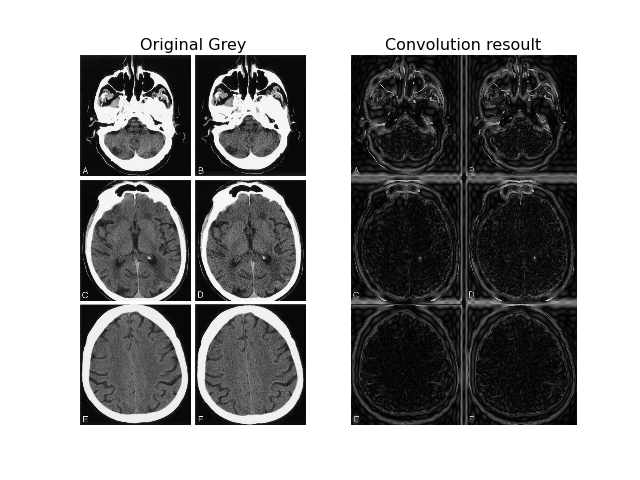

In [12]:
#Filtro passa-baixo ideal
imgILPF = fftim.fft2(imgG)
# Shifting the Fourier frequency image.
imgILPF = fftim.fftshift(imgILPF)
# Intializing variables for convolution function.
M, N = imgILPF.shape[:2]
# H is defined and
# values in H are initialized to 1.
H = np.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius
# Defining the convolution function for ILPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = np.sqrt(r1)
        # Using cut-off radius to eliminate
        # high frequency.
        if r < d_0:
            H[i,j] = 0.0
# Performing the convolution.
imgILPF = imgILPF * H
# Computing the magnitude of the inverse FFT.
imgILPF = abs(fftim.ifft2(imgILPF)).astype(np.uint8)
        
fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgILPF, cmap='gray')
ax[1].set_title('Convolution resoult')
ax[1].axis('off')

(-0.5, 662.5, 1085.5, -0.5)

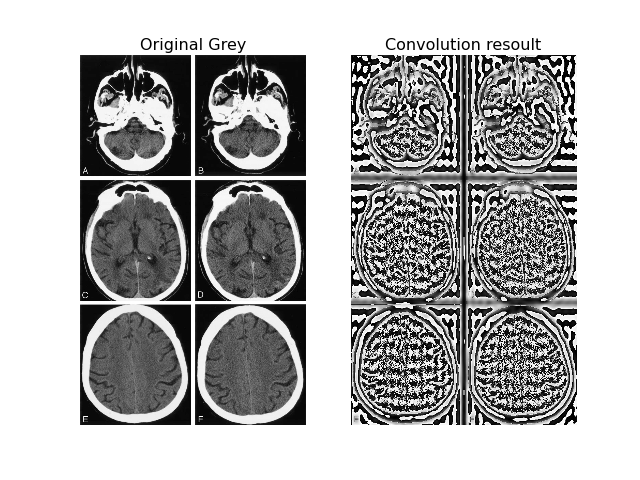

In [13]:
imgFFt = np.fft.fft2(imgG)
imgFFt = np.fft.fftshift(imgFFt)
imgFFtSpec = 20*np.log(np.abs(imgFFt))

rows, cols = imgG.shape
crow,ccol = rows//2 , cols//2
imgFFt[crow-30:crow+31, ccol-30:ccol+31] = 0
imgFFt = np.fft.ifftshift(imgFFt)
imgBack = np.fft.ifft2(imgFFt)
imgBack = np.real(imgBack).astype(np.uint8)


fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgBack, cmap='gray')
ax[1].set_title('Convolution resoult')
ax[1].axis('off')

#### Filtro Butterworth Lowpass

A função de convolução para o filtro passa-baixa Butterworth (BLPF) é dada por:

$$ H(u,v) = \frfac{1}{1 + \left( \frac{d(u,v)}{d_0} \right)^2}   

onde $d_0$ é a distância de corte da origem para a frequência e $d(u, v)$ é a distância euclidiana da origem. Neste filtro, ao contrário do ILPF, a intensidade do pixel no raio de corte não muda rapidamente.

(-0.5, 662.5, 1085.5, -0.5)

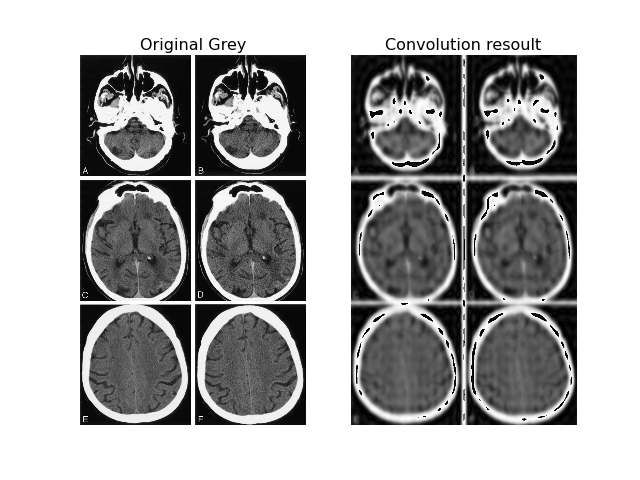

In [14]:
#Filtro Butterworth Lowpass
imgBLPF = fftim.fft2(imgG)
# Shifting the Fourier frequency image.
imgBLPF = fftim.fftshift(imgBLPF)
# Intializing variables for convolution function.
M, N = imgBLPF.shape[:2]
# H is defined and
# values in H are initialized to 1.
H = np.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius
t1 = 1 # the order of BLPF
t2 = 2*t1
# Defining the convolution function for BLPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = np.sqrt(r1)
        # Using cut-off radius to
        # eliminate high frequency.
        if r > d_0:
            H[i,j] = 1/(1 + (r/d_0)**t2)
# Performing the convolution.
imgBLPF = imgBLPF * H
# Computing the magnitude of the inverse FFT.
imgBLPF = abs(fftim.ifft2(imgBLPF)).astype(np.uint8)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgBLPF, cmap='gray')
ax[1].set_title('Convolution resoult')
ax[1].axis('off')

#### Filtro Gaussiano Lowpass

A função de convolução para o filtro Gaussiano passa-baixo (GLPF) é dada abaixo:

$$ H(u, v) = e^{\frac{-d^2(u, v)}{2d_0^2}} $$

(-0.5, 662.5, 1085.5, -0.5)

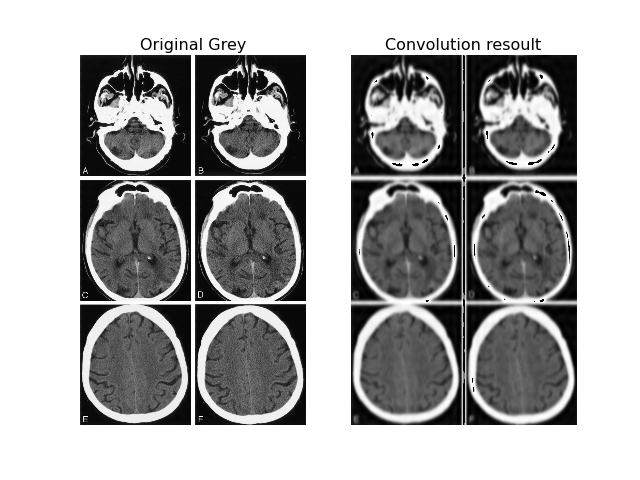

In [15]:
#Filtro Gaussiano Lowpass
# Performing FFT.
imgGLPF = fftim.fft2(imgG)
# Shifting the Fourier frequency image.
imgGLPF = fftim.fftshift(imgGLPF)
# Intializing variables for convolution function.
M, N = imgGLPF.shape[:2]
# H is defined and
# values in H are initialized to 1.
H = np.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius
t1 = 2*d_0
# Defining the convolution function for GLPF
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # euclidean distance from
        # origin is computed
        r = np.sqrt(r1)
        # using cut-off radius to
        # eliminate high frequency
        if r > d_0:
            H[i,j] = np.exp(-r**2/t1**2)
# Performing the convolution.
imgGLPF = imgGLPF * H
# Computing the magnitude of the inverse FFT.
imgGLPF = abs(fftim.ifft2(imgGLPF)).astype(np.uint8)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgGLPF, cmap='gray')
ax[1].set_title('Convolution resoult')
ax[1].axis('off')

#### Filtro passa-alto ideal

(-0.5, 662.5, 1085.5, -0.5)

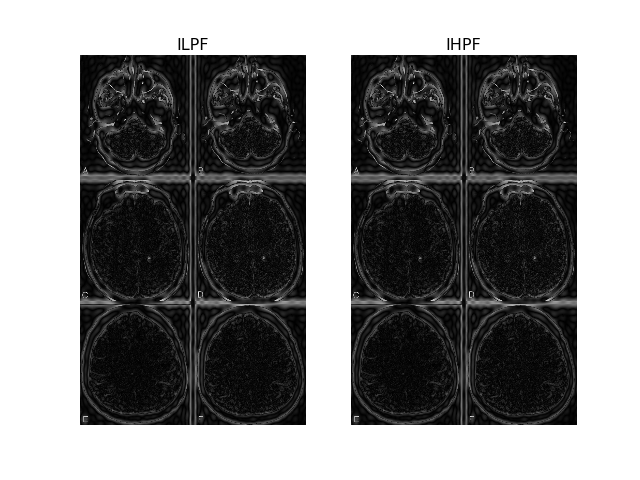

In [16]:
#Filtro passa-alto ideal
# Performing FFT.
imgIHPF = fftim.fft2(imgG)
# shifting the Fourier frequency image
imgIHPF = fftim.fftshift(imgIHPF)
# intializing variables for convolution function
M, N = imgIHPF.shape[:2]
# H is defined and
# values in H are initialized to 1.
H = np.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius

# Defining the convolution function for IHPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = np.sqrt(r1)
        # Using cut-off radius to
        # eliminate low frequency.
        if 0 < r < d_0:
            H[i,j] = 0.0
# Performing the convolution.
imgIHPF = imgIHPF * H
# Computing the magnitude of the inverse FFT.
imgIHPF = abs(fftim.ifft2(imgIHPF)).astype(np.uint8)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgILPF, cmap='gray')
ax[0].set_title('ILPF')
ax[0].axis('off')
ax[1].imshow(imgIHPF, cmap='gray')
ax[1].set_title('IHPF')
ax[1].axis('off')

#### Filtro Butterworth Highpass

(-0.5, 662.5, 1085.5, -0.5)

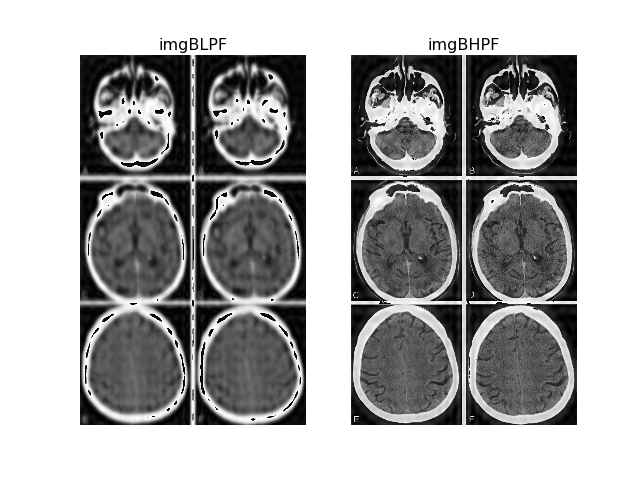

In [17]:
#Filtro Butterworth Highpass
# Performing FFT.
imgBHPF = fftim.fft2(imgG)
# Shifting the Fourier frequency image.
imgBHPF = fftim.fftshift(imgBHPF)
# Intializing variables for convolution function.
M, N = imgBHPF.shape[:2]
# H is defined and
# values in H are initialized to 1.
H = np.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius
t1 = 1 # the order of BHPF
t2 = 2*t1

# Defining the convolution function for BHPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = np.sqrt(r1)
        # Using cut-off radius to
        # eliminate low frequency.
        if 0 < r < d_0:
            H[i,j] = 1/(1 + (r/d_0)**t2)

# performing the convolution
imgBHPF = imgBHPF * H
# computing the magnitude of the inverse FFT
imgBHPF = abs(fftim.ifft2(imgBHPF)).astype(np.uint8)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgBLPF, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('imgBLPF')
ax[0].axis('off')
ax[1].imshow(imgBHPF, cmap='gray')
ax[1].set_title('imgBHPF')
ax[1].axis('off')

#### Filtro Gaussiano Highpass

(-0.5, 662.5, 1085.5, -0.5)

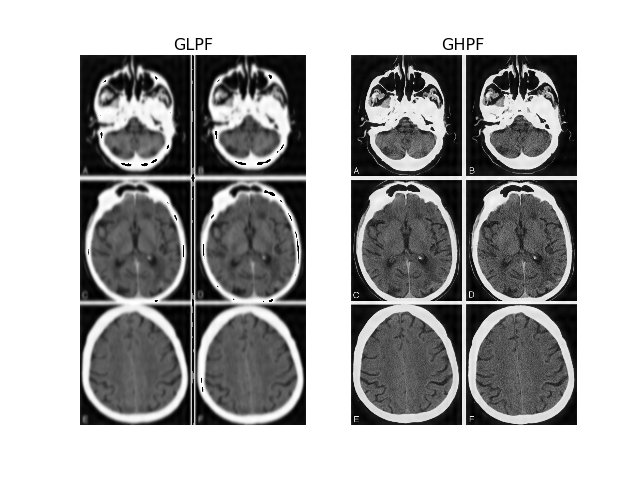

In [18]:
#Filtro Gaussiano Highpass
# Performing FFT.
imgGHPF = fftim.fft2(imgG)
# Shifting the Fourier frequency image.
imgGHPF = fftim.fftshift(imgGHPF)
# Intializing variables for convolution function.
M, N = imgGHPF.shape[:2]
# H is defined and
# values in H are initialized to 1.
H = np.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius
t1 = 2*d_0
# Defining the convolution function for GLPF
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # euclidean distance from
        # origin is computed
        r = np.sqrt(r1)
        # using cut-off radius to
        # eliminate high frequency
        if 0 < r < d_0:
            H[i,j] = np.exp(-r**2/t1**2)
# Performing the convolution.
imgGHPF = imgGHPF * H
# Computing the magnitude of the inverse FFT.
imgGHPF = abs(fftim.ifft2(imgGHPF))

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgGLPF, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('GLPF')
ax[0].axis('off')
ax[1].imshow(imgGHPF, cmap='gray')
ax[1].set_title('GHPF')
ax[1].axis('off')    

#### Filtro passa-banda

(-0.5, 662.5, 1085.5, -0.5)

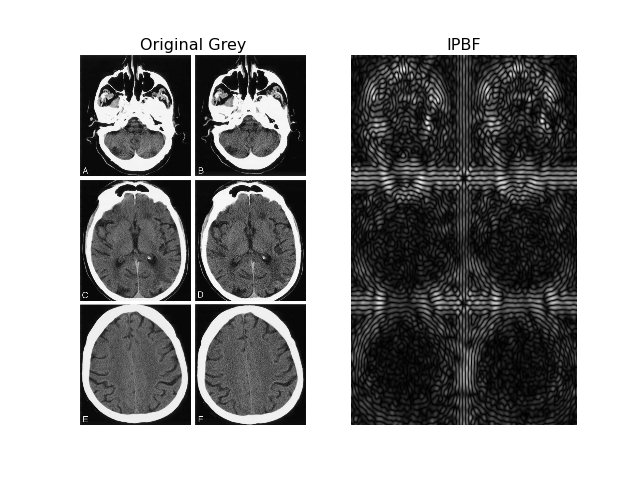

In [19]:
#Filtro passa-banda
# Performing FFT.
imgIPBF = fftim.fft2(imgG)
# Shifting the Fourier frequency image.
imgIPBF = fftim.fftshift(imgIPBF)
# Intializing variables for convolution function.
M, N = imgIPBF.shape[:2]
# H is defined and
# values in H are initialized to 1.
H = np.zeros((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # minimum cut-off radius
d_1 = 50.0 # maximum cut-off radius
# Defining the convolution function for GLPF
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = np.sqrt(r1)
        # Using min and max cut-off to create
        # the band or annulus.
        if r > d_0 and r < d_1:
            H[i,j] = 1.0
# Performing the convolution.
imgIPBF = imgIPBF * H
# Computing the magnitude of the inverse FFT.
imgIPBF = abs(fftim.ifft2(imgIPBF)).astype(np.uint8)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgIPBF, cmap='gray')
ax[1].set_title('IPBF')
ax[1].axis('off') 